In [20]:
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [2]:
IMAGE_SIZE = [224, 224]

In [3]:
train_directory = 'C:\\Users\\Ayush dobhal\\Desktop\\BIRDS-111\\Train'  
val_directory = 'C:\\Users\\Ayush dobhal\\Desktop\\BIRDS-111\\Valid'  
test_directory = 'C:\\Users\\Ayush dobhal\\Desktop\\BIRDS-111\\Test'

In [4]:
# add preprocessing layer to the front of VGG
vgg = VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

# don't train existing weights
for layer in vgg.layers:
  layer.trainable = False

In [5]:
  # useful for getting number of classes
folders = glob('C:\\Users\\Ayush dobhal\\Desktop\\BIRDS-111\\Train\\*')
len(folders)

111

In [6]:
# our layers - you can add more if you want
x = Flatten()(vgg.output)
# x = Dense(1000, activation='relu')(x)
prediction = Dense(len(folders), activation='softmax')(x)

In [7]:
# create a model object
model = Model(inputs=vgg.input, outputs=prediction)

# view the structure of the model
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [8]:
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [9]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory(train_directory,
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

test_set = test_datagen.flow_from_directory(test_directory,
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 17520 images belonging to 111 classes.
Found 555 images belonging to 111 classes.


In [10]:
print(len(training_set))
print(len(test_set))

548
18


In [11]:
r = model.fit(
  training_set,
  validation_data=test_set,
  epochs=25,  
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)


Epoch 1/25
548/548 [==============================] - 2857s 5s/step - loss: 3.1087 - accuracy: 0.4137 - val_loss: 1.3918 - val_accuracy: 0.6865
Epoch 2/25
548/548 [==============================] - 2980s 5s/step - loss: 1.4762 - accuracy: 0.6834 - val_loss: 1.2050 - val_accuracy: 0.7748
Epoch 3/25
548/548 [==============================] - 2959s 5s/step - loss: 1.0964 - accuracy: 0.7534 - val_loss: 1.2142 - val_accuracy: 0.7640
Epoch 4/25
548/548 [==============================] - 2945s 5s/step - loss: 0.8454 - accuracy: 0.8049 - val_loss: 0.9605 - val_accuracy: 0.8036
Epoch 5/25
548/548 [==============================] - 2947s 5s/step - loss: 0.7419 - accuracy: 0.8322 - val_loss: 0.9832 - val_accuracy: 0.8108
Epoch 6/25
548/548 [==============================] - 2960s 5s/step - loss: 0.6354 - accuracy: 0.8519 - val_loss: 1.2019 - val_accuracy: 0.7892
Epoch 7/25
548/548 [==============================] - 2978s 5s/step - loss: 0.6559 - accuracy: 0.8561 - val_loss: 1.3502 - val_accuracy:

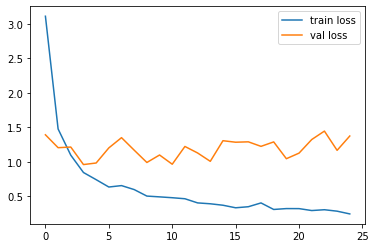

In [12]:
# loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()

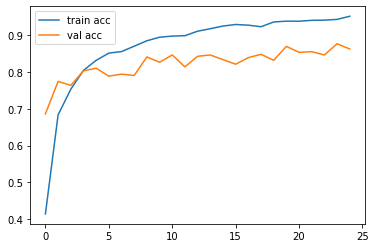

In [13]:
# accuracies
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()

In [14]:
model.save('birds111.h5')

In [15]:
from keras.models import load_model
from tensorflow.keras.preprocessing.image import load_img, img_to_array
model1 = load_model('./birds111.h5',compile=False)  

In [16]:
lab = training_set.class_indices
lab={k:v for v,k in lab.items()}

In [17]:
def output(location):
    img=load_img(location,target_size=(224,224,3))
    img=img_to_array(img)
    img=img/255
    img=np.expand_dims(img,[0])
    answer=model1.predict(img)
    y_class = answer.argmax(axis=-1)
    y = " ".join(str(x) for x in y_class)
    y = int(y)
    res = lab[y]
    return res

1/1 [==============================] - 1s 996ms/step


'Common Chaffinch'

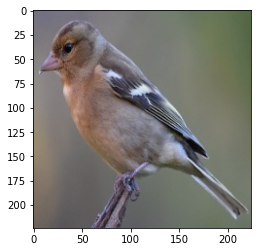

In [18]:
img='C:\\Users\\Ayush dobhal\\Desktop\\BIRDS-111\\Valid\\Common Chaffinch\\1.jpg'
pic=load_img('C:\\Users\\Ayush dobhal\\Desktop\\BIRDS-111\\Valid\\Common Chaffinch\\1.jpg',target_size=(224,224,3))
plt.imshow(pic)
output(img)

In [19]:
import tensorflow as tf
import keras as k
print(tf.__version__)
print(k.__version__)

2.9.1
2.9.0
